# Composer Classification

In [1]:
# Import required libraries
import tensorflow as tf
import os
import numpy as np
import pretty_midi
import librosa
import librosa.display
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Define globals
data_directory = './/data'  #dataset path
fs = 5  # Sampling frequency for piano rolls

In [14]:
# Helper functions

In [15]:
# Function to load midi files, composer labels and compser map in seperate arrays

def load_midi_data_and_labels(directory):
    skipped_files = []    # Keep track of skipped files due to errors
    data = []
    composers = []
    num_composer_map = {}
    # Function to recursively iterate files in a directory
    def iterate_dir(dir_path, label, composer):        
        # Check direct .mid files in current directory
        for item in os.listdir(dir_path):
            item_path = os.path.join(dir_path, item)
            if os.path.isfile(item_path) and item_path.endswith('.mid'):
                try:
                    # Load the MIDI file
                    midi_data = pretty_midi.PrettyMIDI(item_path)
                    data.append(midi_data)
                    composers.append(label)                    
                except Exception as e:  # Catch any exception that might be raised
                    print(f"Skipping file {item_path} due to an error: {e}")
                    skipped_files.append(item_path)
            elif os.path.isdir(item_path):
                iterate_dir(item_path, label, composer)
        print(f"Number of files skipped due to error: {len(skipped_files)}")
        return

    # Process each composer's directory in the root directory
    for label, composer in enumerate(sorted(os.listdir(directory))):
        composer_path = os.path.join(directory, composer)
        if os.path.isdir(composer_path):
            num_composer_map[label] = composer
            iterate_dir(composer_path, label, composer)

    return np.array(data), np.array(composers), num_composer_map


In [16]:
midi_data, composer_labels, composer_map = load_midi_data_and_labels(data_directory)

Number of files skipped due to error: 0
Number of files skipped due to error: 0
Number of files skipped due to error: 0
Skipping file .//data\Beethoven\Anhang 14-3.mid due to an error: Could not decode key with 3 flats and mode 255
Number of files skipped due to error: 1


C:\Users\bplse\anaconda3\envs\Tf_210_Py_3819_Cuda_112_Cudn_81\lib\site-packages\pretty_midi\pretty_midi.py:100: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


Number of files skipped due to error: 1
Number of files skipped due to error: 1


In [17]:
midi_data.shape

(52,)

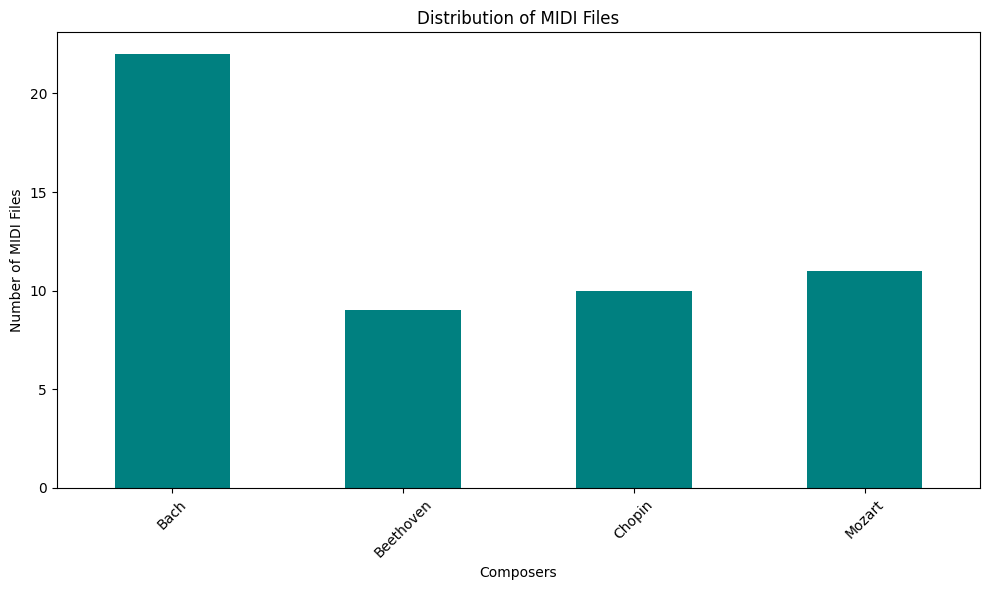

In [12]:
# Explore the MIDI data

# Convert list to pandas Series
composer_series = pd.Series(composer_labels)
# Count of each label
label_counts = composer_series.value_counts().sort_index()
# Map label counts to composer names
composer_counts = label_counts.rename(index=composer_map)
def plot_midi_distribution(composer_counts):
    # Plotting the data
    plt.figure(figsize=(10, 6))
    composer_counts.plot(kind='bar', color='teal')
    plt.xlabel('Composers')
    plt.ylabel('Number of MIDI Files')
    plt.title('Distribution of MIDI Files')
    plt.xticks(rotation=45)
    plt.tight_layout()  # Adjust layout to make room for rotated x-axis labels
    plt.show()

plot_midi_distribution(composer_counts)


## Data Pre-processing: 

Convert the musical scores into a format suitable for deep learning models. This involves converting the musical scores into MIDI
files and applying data augmentation techniques.


## Feature Extraction: 

Extract features from the MIDI files, such as notes, chords, and tempo, using music analysis tools.

## Model Building: 

Develop a deep learning model using LSTM and CNN architectures to classify the musical scores according to the composer.

## Model Training: 

Train the deep learning model using the pre-processed and feature-extracted data.

## Model Evaluation: 

Evaluate the performance of the deep learning model using accuracy, precision, and recall metrics.

## Model Optimization: 

Optimize the deep learning model by fine-tuning hyperparameters.